#### Pathwise derivative vs score function

In [28]:
import numpy as np
import pandas as pd
import os
import glob
import tqdm
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns
import sklearn

eps = np.finfo(float).eps

plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline
sns.set()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Problem move to a desired target coordinate in 2D. Fix stand. dev

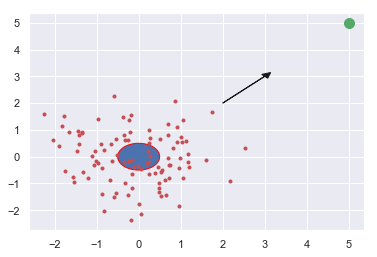

In [27]:
mean_npy = np.zeros(2)
target_mean = np.array([5, 5])


mu_init = np.zeros(2)
n_sample = 100

x_samp = np.random.randn(n_sample, 2) + mu_init[None]
target_point = np.array([5., 5.])

plt.plot(x_samp[:, 0], x_samp[:, 1], 'r.', label=x_samp)
plt.plot(target_point[0], target_point[1], 'g.', ms=20, label='target')

el = Ellipse(xy=mu_init, width=2*0.5, height=2*0.5, angle=0)
el.set_edgecolor('red')
plt.arrow(2, 2, 1, 1, head_width=.2, head_length=.2, fc='k', ec='k')
plt.gca().add_artist(el)
plt.show()

### Pathwise derivative
* Draw sample as mu + eps * sigma
* reward = -(sample - target_mu) ** 2

### Score function estimation
* grad_log_mu = (sample - mu) for std=1
* reward = -(sample - target_mu) ** 2

In [16]:
def pd_update(mu, target_mu, step_size=0.1, n_samples=1):
    draw = np.random.randn(n_samples, 2) + mu
    grad_est = -np.mean(draw - target_mu, axis=0)
    mu = mu + step_size * grad_est
    return mu

def sf_update(mu, target_mu, step_size=0.1, n_samples=1):
    draw = np.random.randn(n_samples, 2) + mu
    rewards = -np.sum((draw-target_mu) ** 2, axis=1)
    grad_log_mu = (draw-mu)
    grad_est = np.mean(rewards[:, None] * grad_log_mu, axis=0)
    mu = mu + step_size * grad_est
    return mu

### Visualize

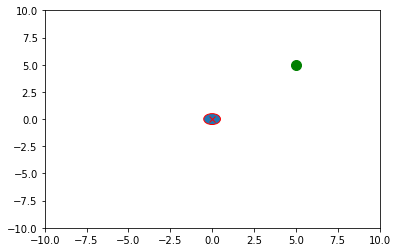

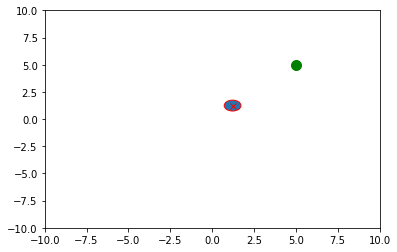

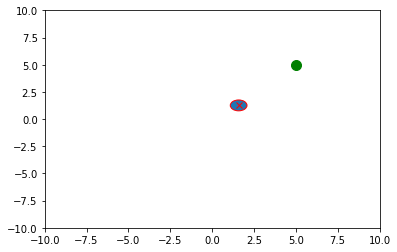

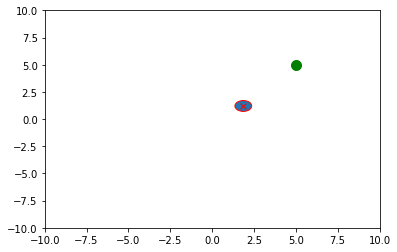

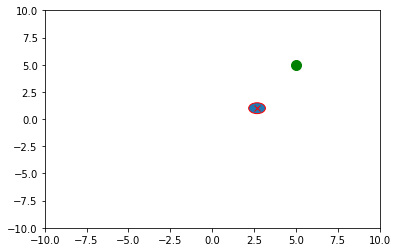

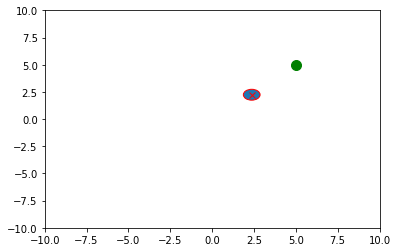

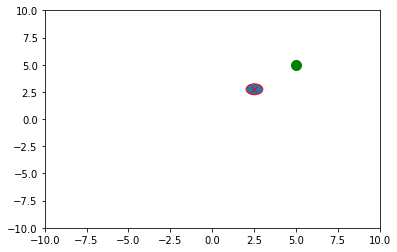

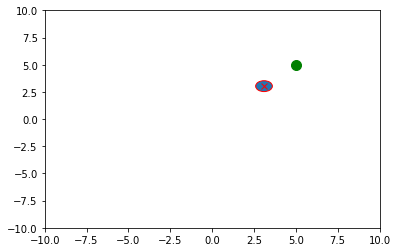

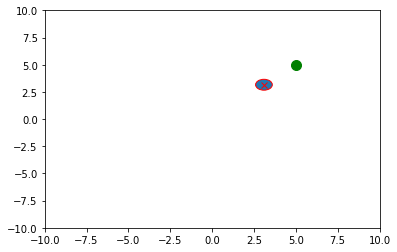

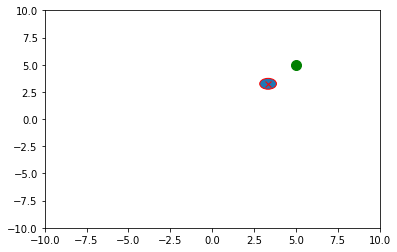

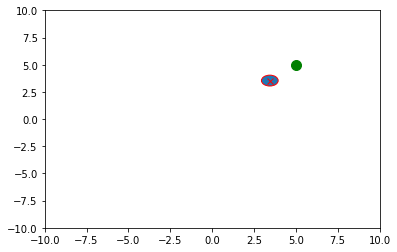

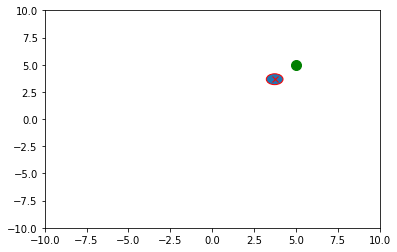

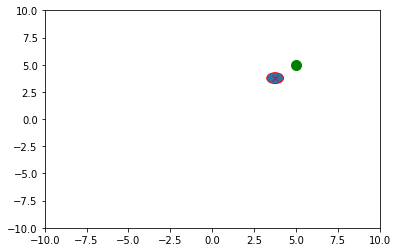

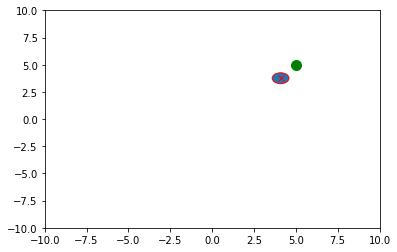

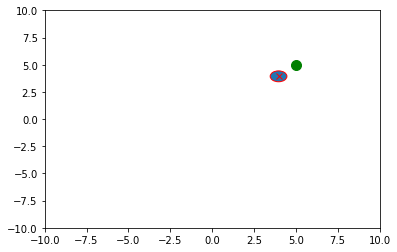

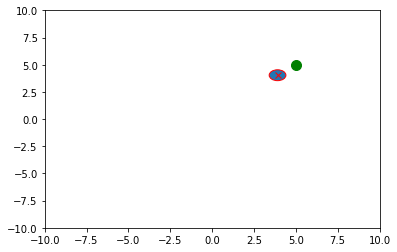

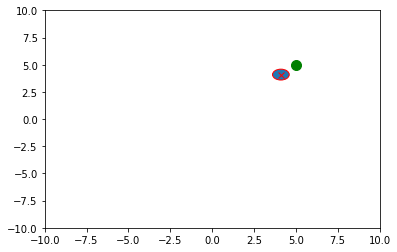

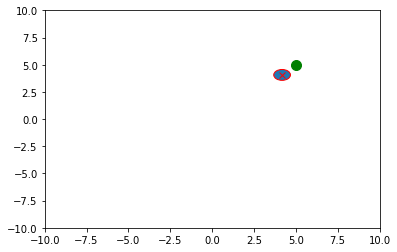

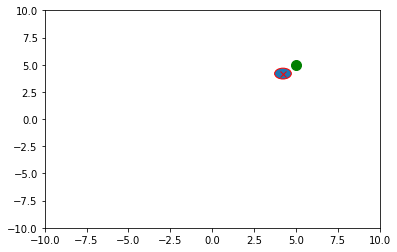

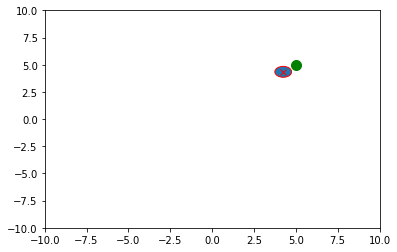

In [24]:
# SF
step_size = 0.05
mu = np.zeros(2)
n_samples = 20

for _ in range(20):
    plt.clf()
    plt.plot(target_point[0], target_point[1], 'g.', ms=20, label='target_samp')
    el = Ellipse(xy=mu, width=2*0.5, height=2*0.5, angle=0)
    el.set_edgecolor('red')
    plt.gca().add_artist(el)
    plt.plot(mu[0], mu[1], 'rx', label="mean")
    plt.axis([-10, 10, -10, 10])
    plt.pause(1)
    mu = sf_update(mu=mu, target_mu=target_mean, n_samples=n_samples, step_size=step_size)
    plt.show()

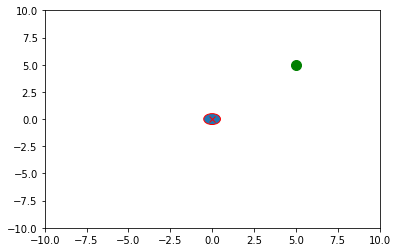

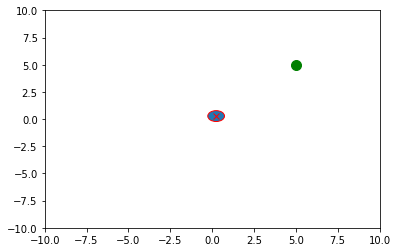

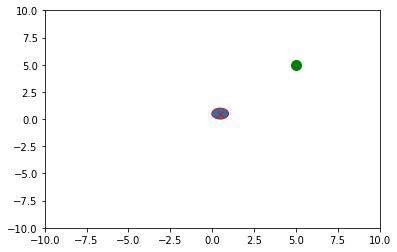

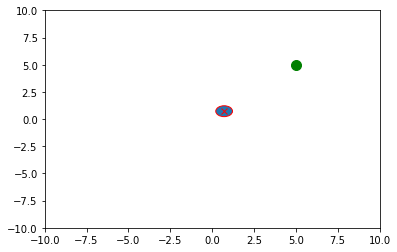

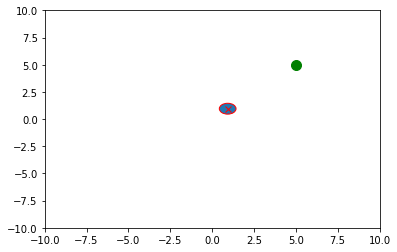

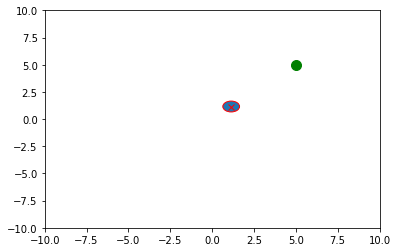

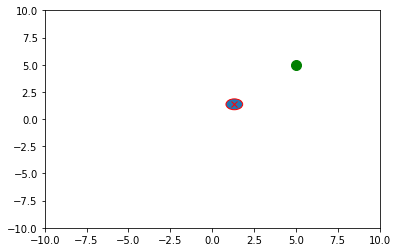

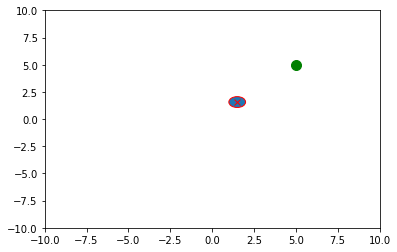

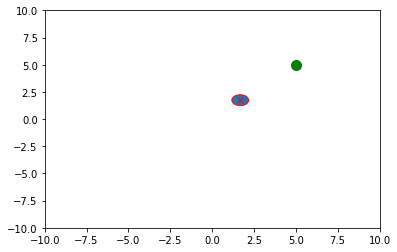

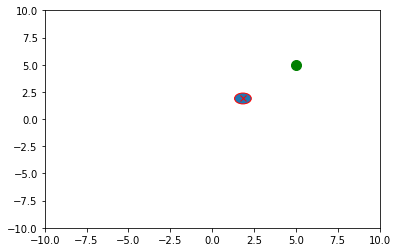

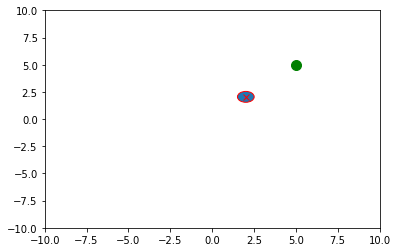

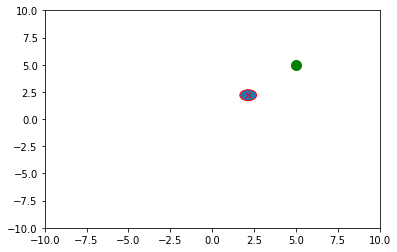

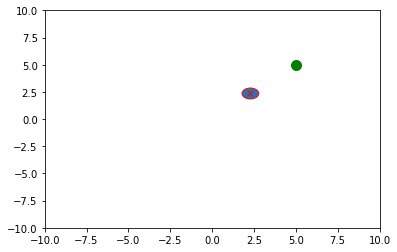

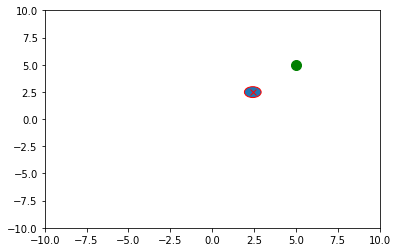

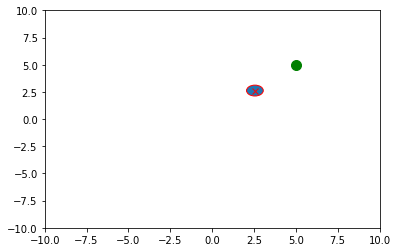

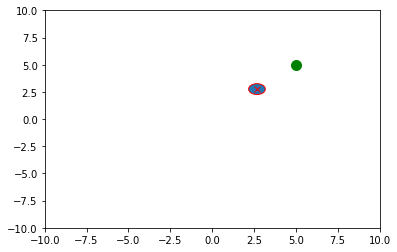

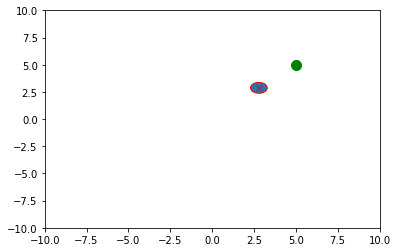

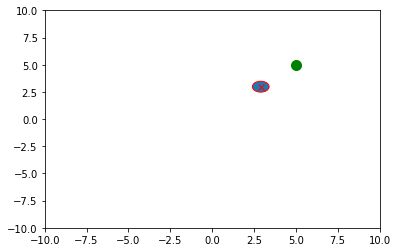

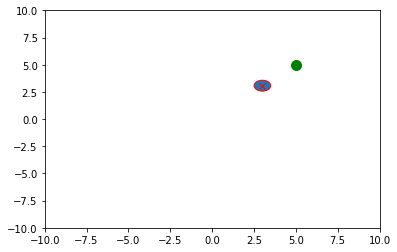

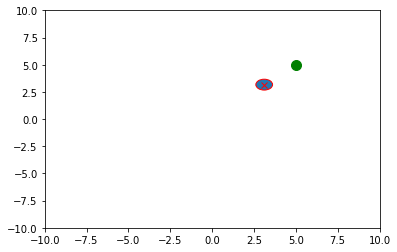

In [25]:
# PD
step_size = 0.05
mu = np.zeros(2)
n_samples = 20

for _ in range(20):
    plt.clf()
    plt.plot(target_point[0], target_point[1], 'g.', ms=20, label='target_samp')
    el = Ellipse(xy=mu, width=2*0.5, height=2*0.5, angle=0)
    el.set_edgecolor('red')
    plt.gca().add_artist(el)
    plt.plot(mu[0], mu[1], 'rx', label="mean")
    plt.axis([-10, 10, -10, 10])
    plt.pause(1)
    mu = pd_update(mu=mu, target_mu=target_mean, n_samples=n_samples, step_size=step_size)
    plt.show()